# Goodreads: Predicting the book rating

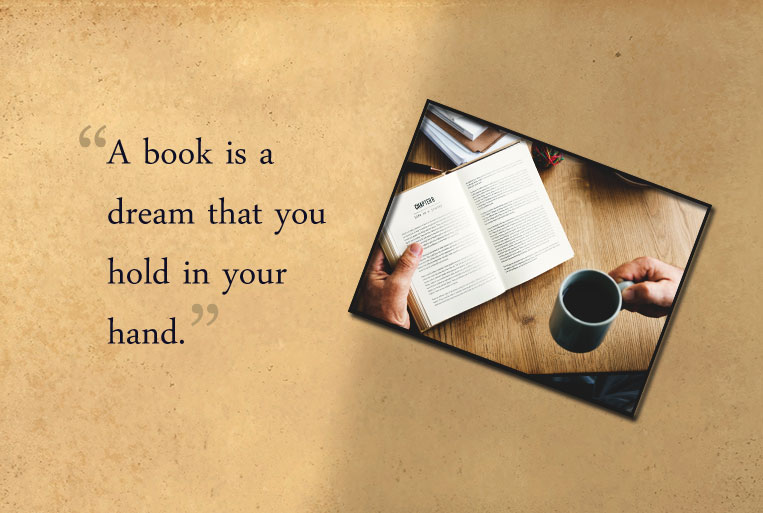

Team 4: **Suhas Reddy Inturi, Magose Ileleji, Pranali Bakhai, Kamran Arif, Darren Ranck**

Problem Statement: Predicting the rating of a new book based on a specific set of features.

Our goal is to predict the rating that a book can receive based on a specific set of features. We will use Machine learning models on an extensive dataset scraped from "Goodreads" website to better understand what features impact the ratings the most and thus better predict the ratings.

Dataset link: Kaggle link https://github.com/suhasinturi/IS833_Team4/blob/main/goodreads_books_31features.csv

The basic idea behind analysing the Goodreads dataset is to get a fair idea about the relationships between the multiple attributes/features a book might have, such as:the average rating of each book, the trend of the authors over the years and books with various lanratingsguages. With over a fifty thousand ratings, there are books which just tend to become popular as each day seems to pass.

We've always considered the magical persona books seem to hold, and with this notebook, we step out on a journey to see what kind of features really drives people to rate a book higher.

The Goodreads dataset we took has multiple attributes out of which "rating" is a prominent one. We are analysing the relationship between all other attributes and "rating" to find out which attributes would help us to predict the rating of a book. We have a huge dataset, with almost 52,199 entries.

We were always passionate about identifying what attributes would contribute to a book's overall rating and we see this as an opportunity to solve that challenge and also be able to predict the ratings of books that will be released in the future. We will also come up with a set of principles that would guarantee a good rating for a book.

1. Data Description
2. Data Exploration
3. Data Cleaning
4. Data Visualisation
5. Data Preprocessing
6. Machine Learning Model

# Data Description

## Import libraries

Importing all the necessary libraries

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [134]:
%matplotlib inline
sns.set(style = 'darkgrid')
sns.set_palette('deep')

Mounting data from Google drive

In [135]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive')
%mkdir Goodreads/
%cp gdrive/Shareddrives/IS_833/goodreads_books_31features.csv Goodreads/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
mkdir: cannot create directory ‘Goodreads/’: File exists


Load the dataset into "books" dataframe and check the size

In [136]:
books = pd.read_csv('Goodreads/goodreads_books_31features.csv')
books.shape

(52199, 31)

In [137]:
books.head(5)

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,date_published,publisher,original_title,genre_and_votes,isbn,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,630104,Inner Circle,https://www.goodreads.com//book/show/630104.In...,(Private #5),https://i.gr-assets.com/images/S/compressed.ph...,"Kate Brian, Julian Peploe",https://www.goodreads.com/author/show/94091.Ka...,7597,196,4.03,3045,2323,1748,389,92,220.0,January 1st 2007,Simon Schuster Books for Young Readers,Inner Circle,"Young Adult 161, Mystery 45, Romance 32",1416950419,9781416950417,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...
1,9487,A Time to Embrace,https://www.goodreads.com//book/show/9487.A_Ti...,(Timeless Love #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,4179,177,4.35,2255,1290,518,93,23,400.0,October 29th 2006,Thomas Nelson,NaN,"Christian Fiction 114, Christian 45, Fiction 3...",1595542329,9781595542328,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,"Ideje az Ã¶lelÃ©snek TÃ¶rtÃ©net a remÃ©nyrÅl,..."
2,6050894,Take Two,https://www.goodreads.com//book/show/6050894-t...,(Above the Line #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,6288,218,4.23,3000,2020,1041,183,44,320.0,January 1st 2009,Zondervan,Take Two,"Christian Fiction 174, Christian 81, Fiction 58",NaN,NaN,NaN,"Bloomington, Indiana(United States)",NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...
3,39030,Reliquary,https://www.goodreads.com//book/show/39030.Rel...,(Pendergast #2),https://i.gr-assets.com/images/S/compressed.ph...,"Douglas Preston, Lincoln Child",https://www.goodreads.com/author/show/12577.Do...,38382,1424,4.01,12711,15407,8511,1429,324,464.0,1997,Tor Books,Reliquary,"Thriller 626, Mystery 493, Horror 432, Fiction...",0765354950,9780765354952,NaN,"New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN
4,998,The Millionaire Next Door: The Surprising Secr...,https://www.goodreads.com//book/show/998.The_M...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Thomas J. Stanley, William D. Danko",https://www.goodreads.com/author/show/659.Thom...,72168,3217,4.04,27594,25219,14855,3414,1086,258.0,October 28th 1995,Gallery Books,The Millionaire Next Door: The Surprising Secr...,"Economics-Finance 1162, Nonfiction 910, Busine...",0671015206,9780671015206,NaN,NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...


In [138]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52199 entries, 0 to 52198
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      52199 non-null  int64  
 1   title                   52199 non-null  object 
 2   link                    52199 non-null  object 
 3   series                  23319 non-null  object 
 4   cover_link              51592 non-null  object 
 5   author                  52199 non-null  object 
 6   author_link             52199 non-null  object 
 7   rating_count            52199 non-null  int64  
 8   review_count            52199 non-null  int64  
 9   average_rating          52199 non-null  float64
 10  five_star_ratings       52199 non-null  int64  
 11  four_star_ratings       52199 non-null  int64  
 12  three_star_ratings      52199 non-null  int64  
 13  two_star_ratings        52199 non-null  int64  
 14  one_star_ratings        52199 non-null

#### Columns Description: 

- **ID**: contains the unique ID for each book/series/volume
- **title**: contains the book title
- **series**: contains the title of series of the book
- **author**: contains the author of the book
- **rating_count**: contains the total ratings of the book
- **review_count**: contains the total reviews of the book
- **average_rating**: contains the average rating of the books from the users
- **five_star__ratings**: contains total five star ratings of the book by users
- **four_star__ratings**: contains total four star ratings of the book by users
- **three_star__ratings**: contains total three star ratings of the book by users
- **two_star__ratings**: contains total two star ratings of the book by users
- **one_star__ratings**: contains total one star ratings of the book by users
- **number_of_pages**: contains the number of pages in the book
- **date_published**: contains the date each book was published
- **date_published**: contains the date each book was published
- **publisher**: contains the name of the publisher of the book
- **genre_and_votes**: contains multiple genres and votes for each book 
- **isbn**: contains the ISBN(10) number, tells the information about a book - such as edition and publisher
- **isbn13**: contains the new format for ISBN, implemented in 2007 that has 13 digits
- **awards**: contains awards received for each book
- **recommended_books**: contain IDs of books recommended by users
- **books_in_series**: contain IDs of books in the same series

In [139]:
books.describe()

,id,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages
count,5.219900e+04,5.219900e+04,52199.000000,52199.000000,5.219900e+04,5.219900e+04,52199.000000,52199.000000,52199.000000,49869.000000
mean,1.015443e+07,1.887361e+04,1012.980881,4.020610,7.817176e+03,6.250785e+03,3456.512424,935.496600,413.640051,328.942730
std,1.164443e+07,1.163978e+05,4054.802421,0.367161,5.876373e+04,3.473533e+04,18249.298631,5890.077215,3843.356500,252.790119
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.628190e+05,3.400000e+02,31.000000,3.820000,1.170000e+02,1.090000e+02,63.000000,15.000000,6.000000,210.000000
50%,6.383537e+06,2.295000e+03,163.000000,4.030000,8.100000e+02,7.650000e+02,452.000000,107.000000,36.000000,304.000000
75%,1.738060e+07,9.297500e+03,622.000000,4.230000,3.375500e+03,3.190500e+03,1866.000000,450.000000,151.000000,392.000000
max,5.444299e+07,6.801077e+06,169511.000000,5.000000,4.414877e+06,1.868421e+06,980183.000000,529060.000000,537793.000000,14777.000000


# Data Exploration

Some books in the dataset have "NA" in the 'number_of_pages' column. Replacing all those values with '0'

In [140]:
#replace NA pages in 'number_of_pages' with 0 to then convert 'number_of_pages' from float to int
books['number_of_pages'] = books['number_of_pages'].fillna(0)
books['number_of_pages'] = books['number_of_pages'].astype(int)

Similarly, some dates also have 'NA' values. We are dropping those dates as we only have 382 rows without dates

In [141]:
#replace NA dates in 'date_published' with 0 to then convert 'date_published' from object to datetime
books['date_published'] = books['date_published'].fillna(0)
books['date_published']=pd.to_datetime(books['date_published'], errors='coerce')

books[books['date_published'].isnull()]
#382 rows with null date. We are dropping them.
books['date_published'] = books['date_published'].dropna()
books['year'] = pd.DatetimeIndex(books['date_published']).year # Extract year of publication

## Feature engineering to define new variables


We want to add new features to the dataset. First one is to find the number of occurences of each title.

In [142]:
books['num_of_occ'] = books.groupby('title')['title'].transform('count') # Add a new feature which has the number of occurences of each book

Creating new features to understand the data even better
- '**rate_of_occ**': Average rating of the title multiplied by number of occurences of the book. This indicates how frequent is the rating for a title
- '**rate_weight**': Average rating of the book multiplied by the rating count. This indicates how much value each title has.
- '**rate_per_pages**': Average rating multiplied by number of pages. This indicates how much rating we have per page.

In [143]:
books['rate_of_occ'] = books['average_rating'] * books['num_of_occ']
books['rate_weight'] = books['average_rating'] * books['rating_count']
books['rate_per_pages'] = books['average_rating'] * books['number_of_pages']

Understanding the series column

In [144]:
books["series"]

0               (Private #5)
1         (Timeless Love #2)
2        (Above the Line #2)
3            (Pendergast #2)
4                        NaN
                ...         
52194                    NaN
52195                    NaN
52196                    NaN
52197           (Private #4)
52198                    NaN
Name: series, Length: 52199, dtype: object

If a book is a part of a series, then this column has the series name followed by the book number. All other books have 'NaN'

In [145]:
books.series.describe()

count                   23319
unique                  22654
top       (Star Wars Legends)
freq                       13
Name: series, dtype: object

In [146]:
books["genre_and_votes"]

0                  Young Adult 161, Mystery 45, Romance 32
1        Christian Fiction 114, Christian 45, Fiction 3...
2          Christian Fiction 174, Christian 81, Fiction 58
3        Thriller 626, Mystery 493, Horror 432, Fiction...
4        Economics-Finance 1162, Nonfiction 910, Busine...
                               ...                        
52194    Romance-Historical Romance 335, Romance 312, H...
52195    Nonfiction 1307, Short Stories 766, Writing-Es...
52196    Fiction 13, Childrens 11, Historical-Historica...
52197              Young Adult 182, Mystery 52, Romance 34
52198    Biography 176, Nonfiction 171, Politics 165, B...
Name: genre_and_votes, Length: 52199, dtype: object

'genre_and_votes' column has various genres of the book and how many votes for that particular genre. We want to seperate these values.

##Column data Manipulation

Since the data in 'genres_and_votes' column is not well formatted, we are trying to split the column, find the genre and assign the votes to the genre. We then identify the top 10 genres and use them in our prediction model.

In [147]:
def populate_genre_cols(books, genre):
    book_genres = books["genre_and_votes"]
    if type(book_genres) == type(float('nan')):
        return None
    genre_list = book_genres.split(",")
    for i in genre_list:
        if genre == " ".join(i.split()[:-1]):
            return int(i.split()[-1].replace("user", ""))
    return None
        
genre_count = {}

for i in books["genre_and_votes"]:
    if type(i) != type(float('nan')):
        book_genres = [" ".join(j.split()[:-1]) for j in i.split(",")]
        for j in book_genres:
            if j not in genre_count.keys():
                genre_count[j] = 1
            else:
                genre_count[j] += 1
                
genres_to_use = set()

for k, v in genre_count.items():
    if v >= 1000:
        genres_to_use.add(k)

top_features_list=[]
top_features = list(genres_to_use)[:11]
for i in top_features:
    books[i.lower().replace(" ", "_")] = books.apply(populate_genre_cols, genre=i, axis=1)
    top_features_list.append(i.lower().replace(" ", "_")) 

print(top_features_list)



['fiction', 'adventure', 'humor', 'romance-paranormal_romance', 'literature', 'science_fiction-dystopia', 'womens_fiction-chick_lit', 'poetry', 'history', 'new_adult', 'adult']


##Word cloud

Let's populate the word cloud of description and see which words are used the most.

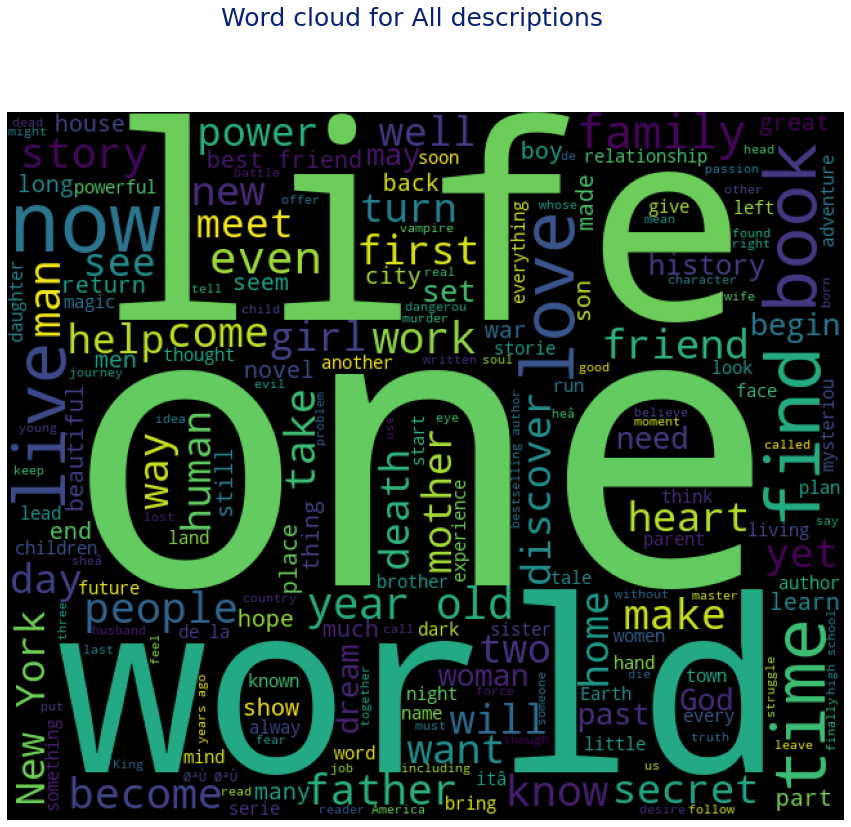

In [148]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='#000',
                          width=650,
                          height=550,
                          stopwords=STOPWORDS).generate(" ".join(str(v) for v in books.description.unique()))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.figtext(.5,.91,'Word cloud for All descriptions', color='#062175', fontsize=25, ha='center')
plt.show()

From the above image, looks like "One" is the most used word followed by "life", "love", "find". Surprisingly, all of us want to be the "One" and in "life", we are all "find"ing "love".

## Remove unnecessary columns

We believe that following columns are not going to impact average_rating at all and thus we are dropping them.

In [149]:
books = books.drop(columns = ['link','cover_link','author_link','original_title','isbn13','asin','settings','characters','id','isbn','amazon_redirect_link','description','worldcat_redirect_link' , 'publisher','recommended_books','books_in_series','date_published'])
print(books.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52199 entries, 0 to 52198
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       52199 non-null  object 
 1   series                      23319 non-null  object 
 2   author                      52199 non-null  object 
 3   rating_count                52199 non-null  int64  
 4   review_count                52199 non-null  int64  
 5   average_rating              52199 non-null  float64
 6   five_star_ratings           52199 non-null  int64  
 7   four_star_ratings           52199 non-null  int64  
 8   three_star_ratings          52199 non-null  int64  
 9   two_star_ratings            52199 non-null  int64  
 10  one_star_ratings            52199 non-null  int64  
 11  number_of_pages             52199 non-null  int64  
 12  genre_and_votes             49359 non-null  object 
 13  awards                      106

#Data Cleaning

Converting 'awards' and 'series' columns which are strings to integers. The model that we are going to use will not be able to understand the difference between various models or various series. But if a book has some awards, that means the book usually has higher rating. So, we are only interested if it has awards or not and not what award the title has got. Same is the case with series. We are interested if the title is a part of the series or not and not the name of the series

In [150]:
books['awards'].loc[~books['awards'].isnull()] = 1  # not nan
books['awards'].loc[books['awards'].isnull()] = 0   # nan
books['awards']
books['series'].loc[~books['series'].isnull()] = 1  # not nan
books['series'].loc[books['series'].isnull()] = 0   # nan
books

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,genre_and_votes,awards,year,num_of_occ,rate_of_occ,rate_weight,rate_per_pages,fiction,adventure,humor,romance-paranormal_romance,literature,science_fiction-dystopia,womens_fiction-chick_lit,poetry,history,new_adult,adult
0,Inner Circle,1,"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,389,92,220,"Young Adult 161, Mystery 45, Romance 32",0,2007.0,1,4.03,30615.91,886.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A Time to Embrace,1,Karen Kingsbury,4179,177,4.35,2255,1290,518,93,23,400,"Christian Fiction 114, Christian 45, Fiction 3...",0,2006.0,1,4.35,18178.65,1740.00,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Take Two,1,Karen Kingsbury,6288,218,4.23,3000,2020,1041,183,44,320,"Christian Fiction 174, Christian 81, Fiction 58",0,2009.0,2,8.46,26598.24,1353.60,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Reliquary,1,"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,1429,324,464,"Thriller 626, Mystery 493, Horror 432, Fiction...",0,1997.0,1,4.01,153911.82,1860.64,422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Millionaire Next Door: The Surprising Secr...,0,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,3414,1086,258,"Economics-Finance 1162, Nonfiction 910, Busine...",1,1995.0,1,4.04,291558.72,1042.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52194,The Stranger I Married,0,Sylvia Day,13295,805,3.87,4220,4733,3116,848,378,312,"Romance-Historical Romance 335, Romance 312, H...",0,2007.0,1,3.87,51451.65,1207.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0
52195,The Opposite of Loneliness: Essays and Stories,0,Marina Keegan,42609,4282,3.84,12461,15191,11202,3011,744,208,"Nonfiction 1307, Short Stories 766, Writing-Es...",1,2014.0,1,3.84,163618.56,798.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0
52196,Sadako will leben,0,Karl Bruckner,1583,64,4.17,673,592,251,51,16,264,"Fiction 13, Childrens 11, Historical-Historica...",1,1961.0,1,4.17,6601.11,1100.88,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52197,Confessions,1,Kate Brian,8815,258,4.09,3760,2734,1780,435,106,240,"Young Adult 182, Mystery 52, Romance 34",0,2007.0,4,16.36,36053.35,981.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since we are gonig to use an encoder later on, we are filling all 'NA' values with 0 now.

In [151]:
books.fillna(0, inplace=True)   # Replace all NaN values with zero, updating the DataFrame directly
books.head()

,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,genre_and_votes,awards,year,num_of_occ,rate_of_occ,rate_weight,rate_per_pages,fiction,adventure,humor,romance-paranormal_romance,literature,science_fiction-dystopia,womens_fiction-chick_lit,poetry,history,new_adult,adult
0,Inner Circle,1,"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,389,92,220,"Young Adult 161, Mystery 45, Romance 32",0,2007.0,1,4.03,30615.91,886.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A Time to Embrace,1,Karen Kingsbury,4179,177,4.35,2255,1290,518,93,23,400,"Christian Fiction 114, Christian 45, Fiction 3...",0,2006.0,1,4.35,18178.65,1740.00,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Take Two,1,Karen Kingsbury,6288,218,4.23,3000,2020,1041,183,44,320,"Christian Fiction 174, Christian 81, Fiction 58",0,2009.0,2,8.46,26598.24,1353.60,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Reliquary,1,"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,1429,324,464,"Thriller 626, Mystery 493, Horror 432, Fiction...",0,1997.0,1,4.01,153911.82,1860.64,422.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The Millionaire Next Door: The Surprising Secr...,0,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,3414,1086,258,"Economics-Finance 1162, Nonfiction 910, Busine...",1,1995.0,1,4.04,291558.72,1042.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
books["series"] = books["series"].apply(lambda x: 1 if x!=0 else 0)   # Replace all non-null values in series column with 1
books.head()

,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,genre_and_votes,awards,year,num_of_occ,rate_of_occ,rate_weight,rate_per_pages,fiction,adventure,humor,romance-paranormal_romance,literature,science_fiction-dystopia,womens_fiction-chick_lit,poetry,history,new_adult,adult
0,Inner Circle,1,"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,389,92,220,"Young Adult 161, Mystery 45, Romance 32",0,2007.0,1,4.03,30615.91,886.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A Time to Embrace,1,Karen Kingsbury,4179,177,4.35,2255,1290,518,93,23,400,"Christian Fiction 114, Christian 45, Fiction 3...",0,2006.0,1,4.35,18178.65,1740.00,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Take Two,1,Karen Kingsbury,6288,218,4.23,3000,2020,1041,183,44,320,"Christian Fiction 174, Christian 81, Fiction 58",0,2009.0,2,8.46,26598.24,1353.60,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Reliquary,1,"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,1429,324,464,"Thriller 626, Mystery 493, Horror 432, Fiction...",0,1997.0,1,4.01,153911.82,1860.64,422.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The Millionaire Next Door: The Surprising Secr...,0,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,3414,1086,258,"Economics-Finance 1162, Nonfiction 910, Busine...",1,1995.0,1,4.04,291558.72,1042.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creating a new data frame 'books_features' with the most important columns and understanding if there are any outliers in them.

In [153]:
books_features = books[['rating_count','review_count','average_rating','five_star_ratings','four_star_ratings','three_star_ratings','two_star_ratings','one_star_ratings','number_of_pages','genre_and_votes']]
books_features.head()

,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,genre_and_votes
0,7597,196,4.03,3045,2323,1748,389,92,220,"Young Adult 161, Mystery 45, Romance 32"
1,4179,177,4.35,2255,1290,518,93,23,400,"Christian Fiction 114, Christian 45, Fiction 3..."
2,6288,218,4.23,3000,2020,1041,183,44,320,"Christian Fiction 174, Christian 81, Fiction 58"
3,38382,1424,4.01,12711,15407,8511,1429,324,464,"Thriller 626, Mystery 493, Horror 432, Fiction..."
4,72168,3217,4.04,27594,25219,14855,3414,1086,258,"Economics-Finance 1162, Nonfiction 910, Busine..."


Creating a boxplot for feature "rating_count" to see if there are any outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


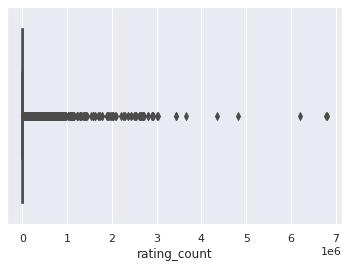

In [154]:
#boxplot to see outliers in rating_count
sns.boxplot(books_features.rating_count)

Removing the outliers in "rating_count" feature to make data clean

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


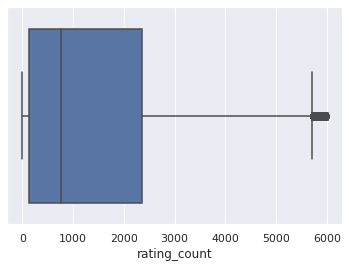

In [155]:
#Removing the outliers for "rating_count" feature using drop function
books_features = books_features.drop(books_features[books_features.rating_count > 6000].index)
sns.boxplot(books_features.rating_count)

Creating a boxplot for feature "review_count" to see if there are any outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


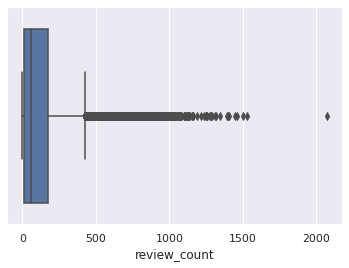

In [156]:
sns.boxplot(books_features.review_count)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


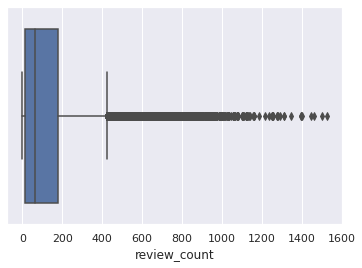

In [157]:
books_features = books_features.drop(books_features[books_features.review_count > 2000].index)
sns.boxplot(books_features.review_count)

Creating a boxplot for feature "average_rating" to see if there are any outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


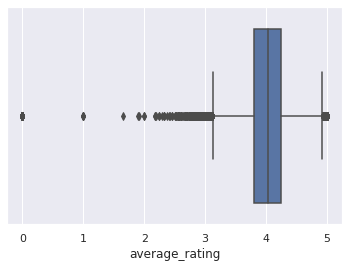

In [158]:
sns.boxplot(books_features.average_rating)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


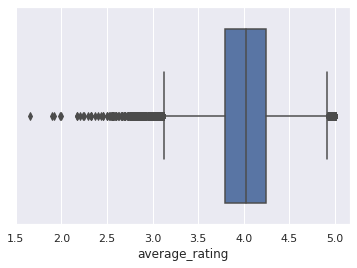

In [159]:
books_features = books_features.drop(books_features[books_features.average_rating < 1.5].index)
sns.boxplot(books_features.average_rating)

Creating a boxplot for feature "five_star_ratings" to see if there are any outliers. We found that there are none.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


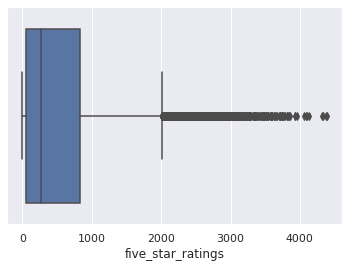

In [160]:
sns.boxplot(books_features.five_star_ratings)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


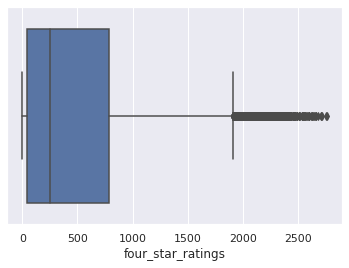

In [161]:
sns.boxplot(books_features.four_star_ratings)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


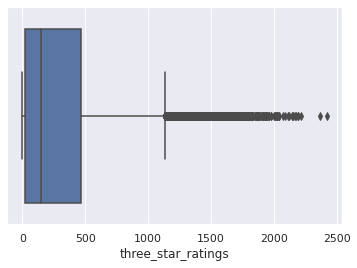

In [162]:
sns.boxplot(books_features.three_star_ratings)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


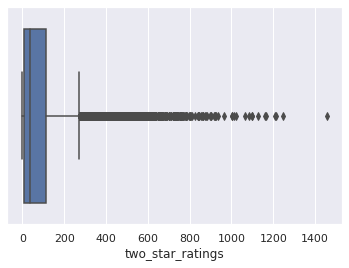

In [163]:
sns.boxplot(books_features.two_star_ratings)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


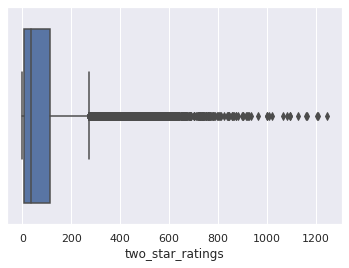

In [164]:
books_features = books_features.drop(books_features[books_features.two_star_ratings > 1400].index)
sns.boxplot(books_features.two_star_ratings)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


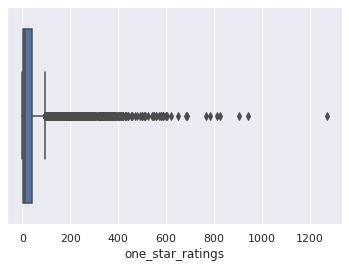

In [165]:
sns.boxplot(books_features.one_star_ratings)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


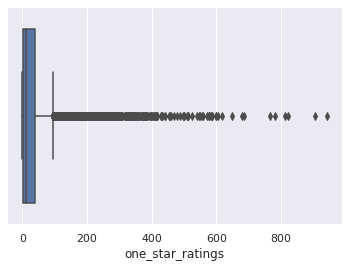

In [166]:
books_features = books_features.drop(books_features[books_features.one_star_ratings > 1200].index)
sns.boxplot(books_features.one_star_ratings)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


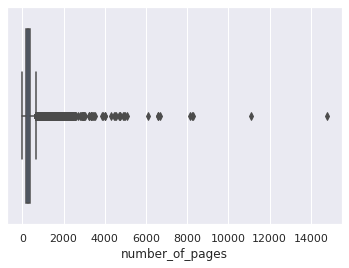

In [167]:
sns.boxplot(books_features.number_of_pages)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


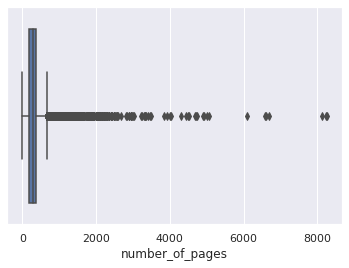

In [168]:
books_features = books_features.drop(books_features[books_features.number_of_pages > 10000].index)
sns.boxplot(books_features.number_of_pages)

In [169]:
# check for duplications
print(books.shape)
books.duplicated().any()

(52199, 30)


True

In [170]:
books = books.drop_duplicates(keep='first')

In [171]:
# check for duplications
books.duplicated().any()

False

In [172]:
books.shape

(52198, 30)

## Heat Map

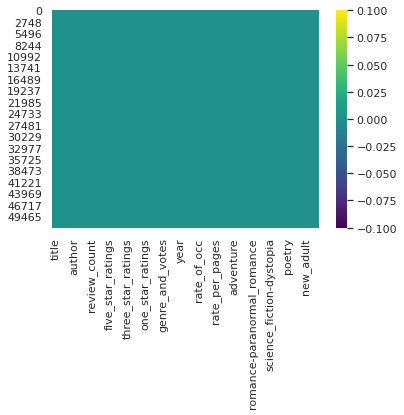

In [173]:
sns.heatmap(books.isnull(), cmap='viridis');


No duplicated or missing values, that makes things a little easier.



# Data Visualisation

## Authors with most books

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


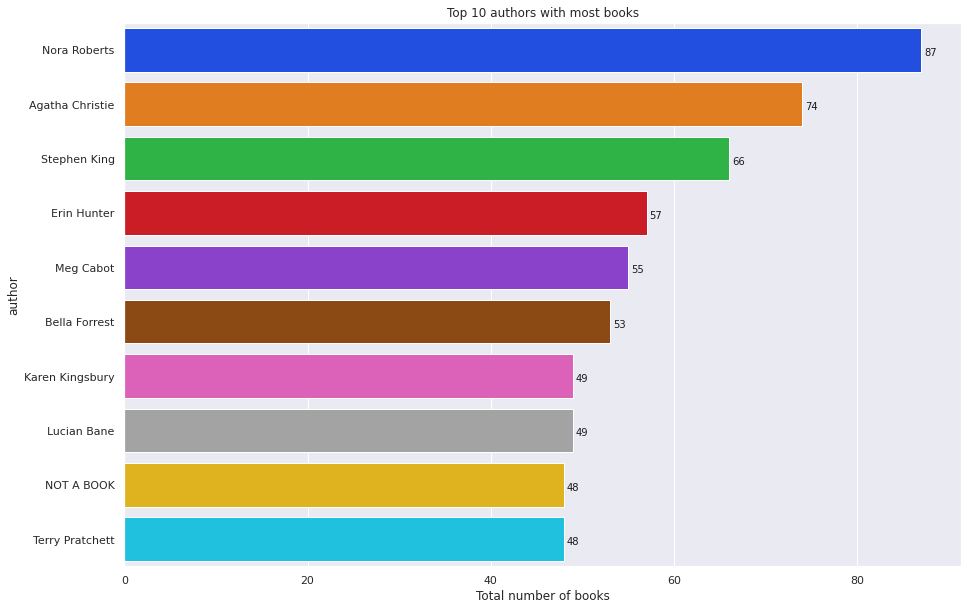

In [174]:
most_books = books.groupby('author')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('author')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='bright')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

We can see from the above plot that Nora Roberts, Agatha Christie have the most number of books in the list - although a lot of them might be just various publications for the same book, as both of them have been working for decades.

From the names in the list, we can again gather that most of the authors have either been writing for decades, churning numerous books from time to time, or are authors who are regaled as the 'classics' in our history.

It seems, hype does play a role in this.

## Top 10 books under 200 pages

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000.]),
 <a list of 9 Text major ticklabel objects>)

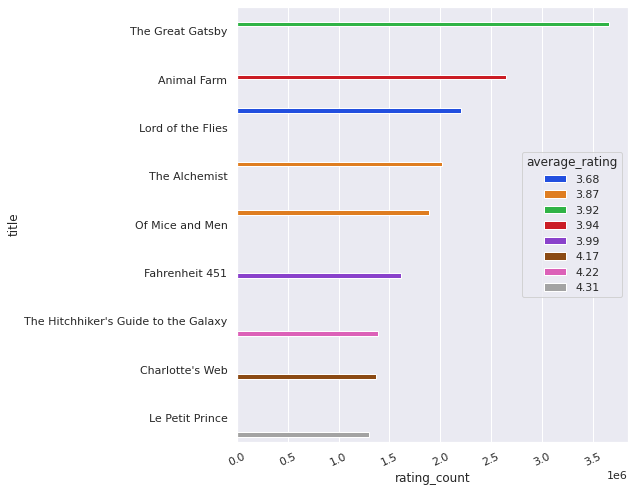

In [175]:
# top 10 books under 200 pages for busy book lovers
plt.figure(figsize=(7,8))
under200 = books[books['number_of_pages'] <= 200]
top10under200 = under200.nlargest(10, ['rating_count'])
ax = sns.barplot(top10under200['rating_count'], top10under200['title'], hue=top10under200['average_rating'], ci=None, palette='bright');
plt.xticks(rotation=25)


Looks like out of all the books below 200 pages, 'The Great Gatsby' and 'Animal Farm' seem to have the highest number of ratings. They don't have the best ratings though. "Le Petit Prince" and "Hitchhiker's guide to the galaxy" have the highest ratings amongst books with less than 200 pages.

## Top 10 highly rated authors

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


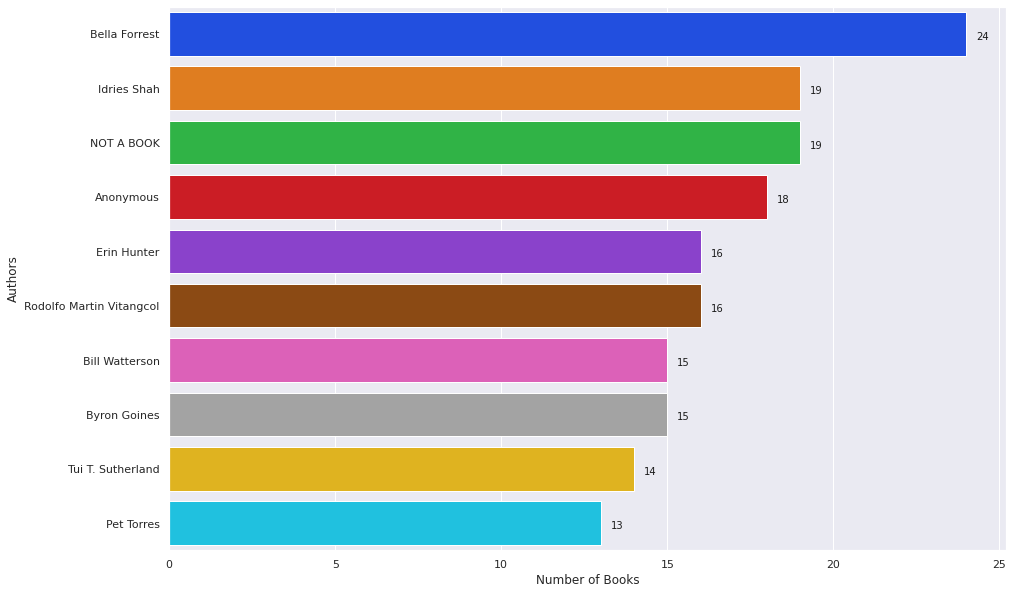

In [176]:
high_rated_author = books[books['average_rating']>=4.5]
high_rated_author = high_rated_author.groupby('author')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('author')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='bright')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

We can infer from the plot that Bella Forrest has the highest ratings for his books, making her average consistency rather impressive. She has 24 books which have more than 4.5 ratings.

It's also impressive to note the vast dominance Bella has over the competition, easily dethroning any other competiton while being above 4.5 in rating.

Bella Forrest is the author of world famous 'Vampire Series'.

### Top 10 Longest Books

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 134 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/us

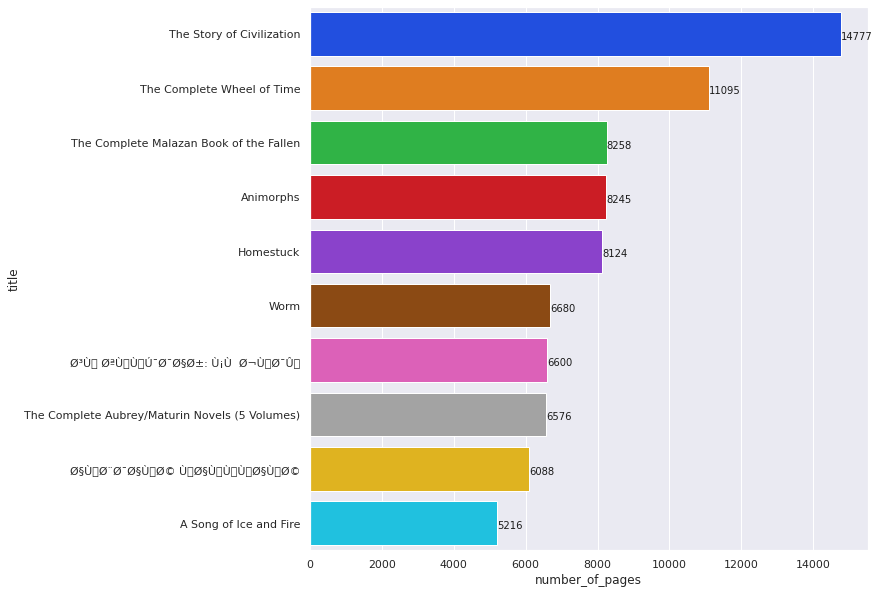

In [177]:

# Firstly here we are assuming that books that are part of a volume or series set is a different or individual book in the dataset 
# Top 10 longest books

plt.figure(figsize=(10,10))
most_rated = books.sort_values(by='number_of_pages', ascending=False).head(10).set_index('title')
ax = sns.barplot(most_rated['number_of_pages'], most_rated.index, palette='bright');
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

On the one hand, "The Story of Civilization" and "The Complete Wheel of Time" should be the longest books in the dataset based purely on subject matter. What we inferrerd here, though, is that the longest books are composed primarily of volume sets, such as the Aubrey/Maturin Novels and "The Story of Civilization", or series bound in one volume, such as the Animorphs series. 

## Top 10 Books by Review Count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


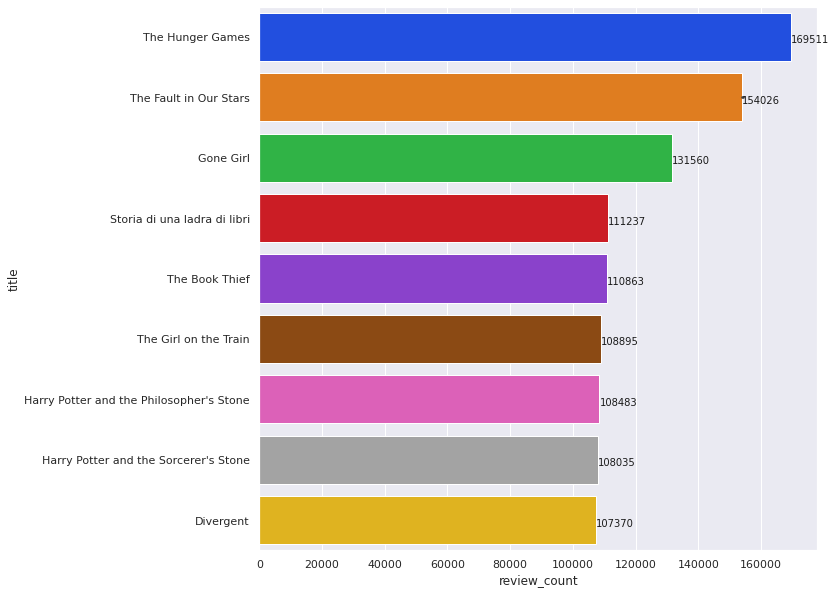

In [178]:
#Top 10 books with most reviews by count
plt.figure(figsize=(10,10))
most_rated = books.sort_values('review_count', ascending = False).head(10).set_index('title')
ax = sns.barplot(most_rated['review_count'], most_rated.index, palette='bright');
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

Even among casual readers, many of these titles wills sound familiar. There appears to be a direct correlation with number of reviews vs. commercial popularity based on outside research, so we could infer that books with a higher number of reviews indicate higher degree of commercial success. We'll explore the implication of that in a future visualization.

## Top 10 Authors by Review Count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/

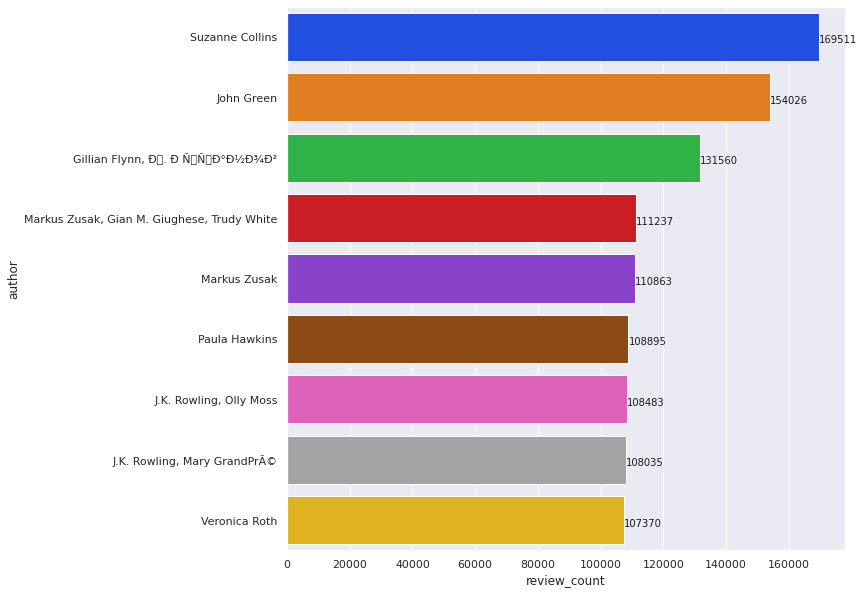

In [179]:
#Top 10 authors with most reviews by count
plt.figure(figsize=(10,10))
most_rated = books.sort_values('review_count', ascending = False).head(10).set_index('author')
ax= sns.barplot(most_rated['review_count'], most_rated.index, palette='bright');
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

Perhaps unsurprisingly, the authors on this list overlap with many of the titles on the top 10 books by review count list. Authors like J.K. Rowling and Suzanne Collins also can contribute review counts to writing popular series, which we may find yields a higher likelihood of users leaving reviews for books in the progression of the series.

## Top 10 Authors by Number of Books Written

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


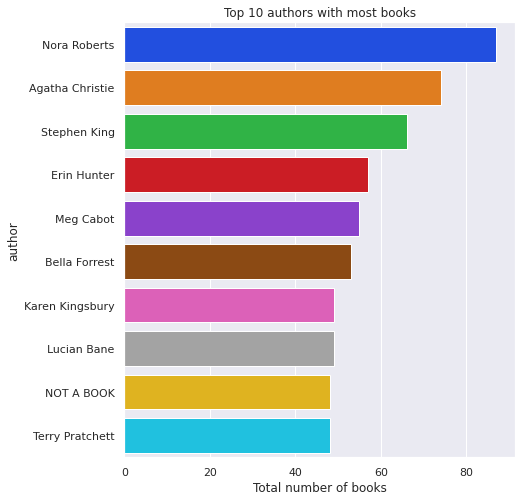

In [180]:
#Which author wrote most number of books?
most_books = books.groupby('author')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('author')
plt.figure(figsize=(7,8))
ax = sns.barplot(most_books['title'], most_books.index, palette='bright')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books");

These prolific authors average about one book a year during the course of their respective writing careers. Interestingly, though, we see no overlap in the last visualization of top ten authors by review count. This indicates inconsistency in the number of reviews an individual book will receive. Additionally, these authors, generally speaking, write individual books rather than series. We might infer the power of book series based on the difference between these two author-driven visualizations.

## Top 10 Books by Rating Count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


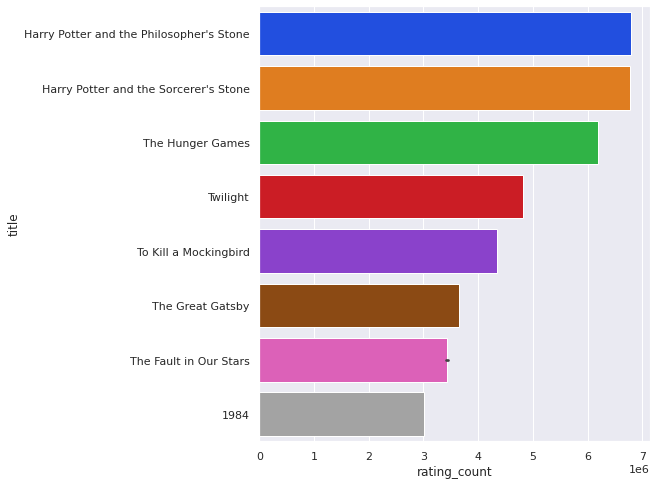

In [181]:
# Books with highest number of ratings
plt.figure(figsize=(7,8))
popular_books = books.nlargest(10, ['rating_count']).set_index('title')['rating_count']
sns.barplot(popular_books, popular_books.index, palette='bright')

This visualization shows more consistency with the top 10 books by review count, which makes sense. A key difference is that there's more of split between classic novels, such as "The Great Gatsby" and "1984", and series like "The Hunger Games." The difference between the two visualizations could indicate greater passion among fans of book series that results in more written reviews in comparison to casual readers rating popular books.

## Top 5 Books by Five-Star Rating Count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


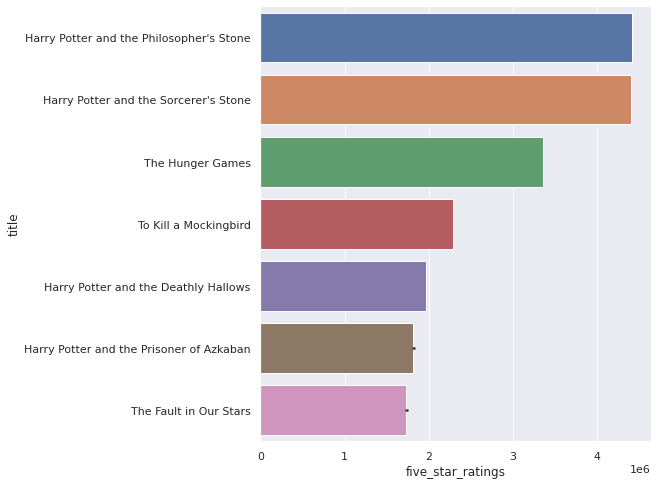

In [182]:
# highest 5 rated books
plt.figure(figsize=(7,8))
highest_reviews = books.nlargest(10, ['five_star_ratings'])
sns.barplot(highest_reviews['five_star_ratings'], highest_reviews['title'])

Once again, we see a preference given towards book series based on this visualization, but also an emerging preference for young adult fiction, as evidenced by the inclusion of "To Kill a Mockingbird" and "The Fault in Our Stars".

## Probability Density Function for Average Rating

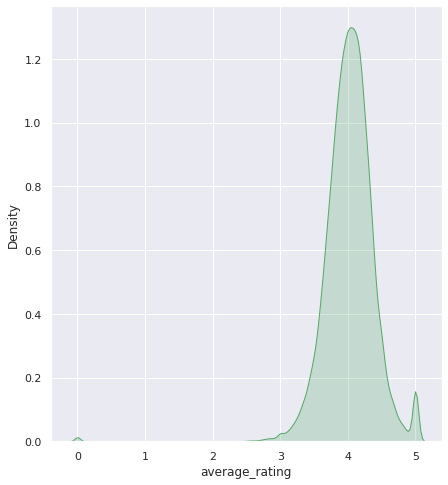

In [183]:
#Probability density function for average rating
plt.figure(figsize=(7,8))
sns.kdeplot(books['average_rating'], shade = True, color='g'); 

On average, the large majority of ratings among the dataset fall between about 3.4 and 4.6. There's a small increase in five star ratings that may be indicative of fan bases rallying around certain books and increasing the number of five star reviews.

## Linear Regression Relationship Between Rating Count and Five Star Review Count

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000., 180000.]),
 <a list of 10 Text major ticklabel objects>)

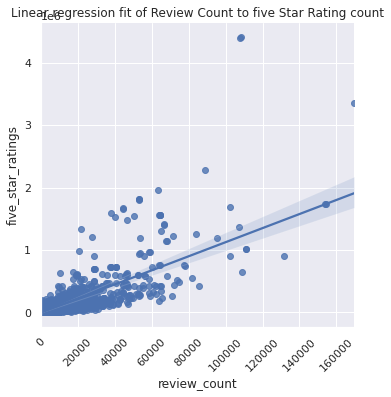

In [184]:
#Linear regression plot of relationship between review count and five star review count
sns.lmplot(x='review_count', y='five_star_ratings', data=books);
plt.title('Linear regression fit of Review Count to five Star Rating count');
plt.xticks(rotation=45)

Based on this plot, there's a generally positive linear relationship between the number of reviews written and the number of five star reviews. 

## Linear Regression Relationship Between Rating Count and One Star Review Count

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000.]), <a list of 8 Text major ticklabel objects>)

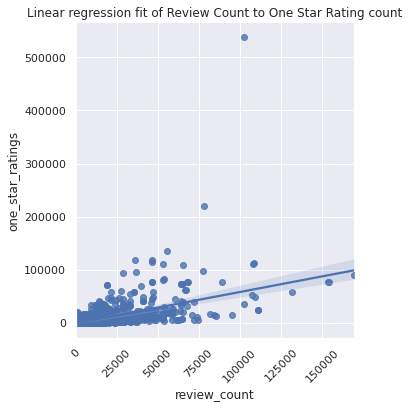

In [185]:
#Linear regression plot of relationship between review count and one star review count
sns.lmplot(x='review_count', y='one_star_ratings', data=books);
plt.title('Linear regression fit of Review Count to One Star Rating count');
plt.xticks(rotation=45)

While this plot of review counts to one star ratings also has a positive relationship, the slope of this visualization compared to the previous one is not nearly as steep and direct. From this we can infer that people are more likely to write a review for a book that they feel positively about in comparison to the one that they do not like and do not want to promote in any way, positive or negative.

## Relation between ratings and review_count

<Figure size 720x720 with 0 Axes>

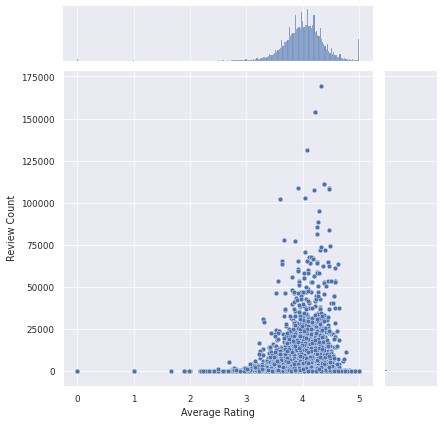

In [186]:
plt.figure(figsize=(10,10))
sns.set_context('paper')
ax =sns.jointplot(x="average_rating",y='review_count', kind='scatter',  data= books[['review_count', 'average_rating']])
ax.set_axis_labels("Average Rating", " Review Count")
plt.show()

We can infer from the plot that most of the ratings for the books seems to lie near 3-4.5, with a heavy amount of reviews lying barely between 0 and 25000, approximately. Majority of reviews for books still lie under 25000, making this whole scenario inconclusive. There might be a relationship, but the reviews seem to be predominant amongst books with decent ratings. One fair conclusion that can be drawn is that usually, higher review counts are associated with better average ratings.

## Relation between number of pages and rating

<Figure size 720x720 with 0 Axes>

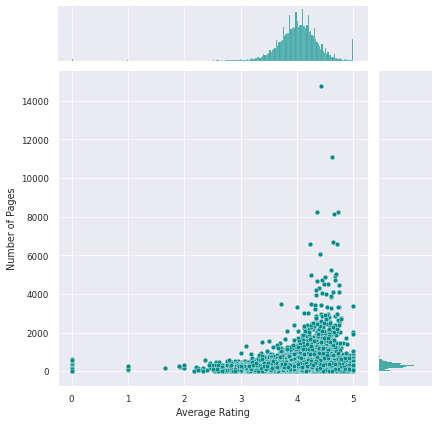

In [187]:
plt.figure(figsize=(10,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="number_of_pages", data = books, color = 'darkcyan')
ax.set_axis_labels("Average Rating", "Number of Pages");

This plot doesn't give that much of an accurate inference due to the massive presence of outliers for books above 750 pages. This is also inconclusive.

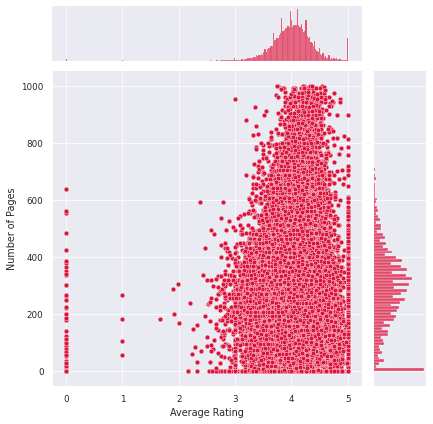

In [188]:
temp = books[~(books['number_of_pages']>1000)]
ax = sns.jointplot(x="average_rating", y="number_of_pages", data = temp, color = 'crimson')
ax.set_axis_labels("Average Rating", "Number of Pages");

From the given plot, we can infer that the highest ratings ever given, usually are for books with the page range of 200-400, peaking near 250. This might mean that people usually want to read books that are not too lengthy, somewhere between 200 and 400 pages.

## Relation between average rating and number of five star reviews

<Figure size 720x720 with 0 Axes>

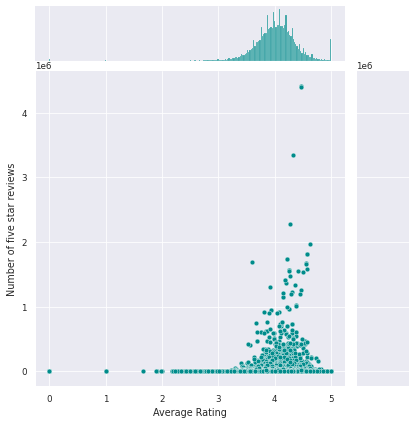

In [189]:
plt.figure(figsize=(10,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="five_star_ratings", data = books, color = 'darkcyan')
ax.set_axis_labels("Average Rating", "Number of five star reviews");

From the above data, most of the 5 star average ratings have lesser number of five star reviews. It is evident from the graph that as the number of five star reviews increase, so does the average rating.

## Relation between average rating and rating count

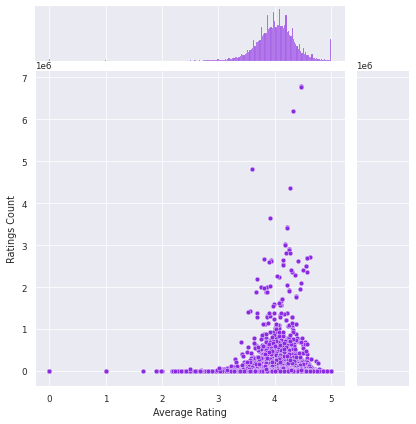

In [190]:
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="rating_count", data = books, color = 'blueviolet')
ax.set_axis_labels("Average Rating", "Ratings Count")

From the graph, we can see that there can be a potential relationship between the average rating and ratings count. As the number of ratings increase, the rating for the book seems to increase towards 4. 

# Relation between average rating and number of occurences

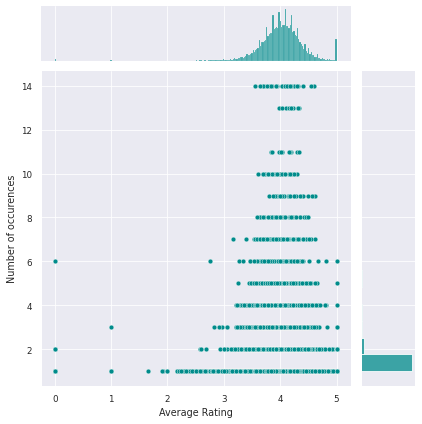

In [191]:
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="num_of_occ", data = books, color = 'darkcyan')
ax.set_axis_labels("Average Rating", "Number of occurences");

Is is observed that higher if the book is seen in the dataset for more than 1 time, usually it has higher ratings. The data set that we have doesn't have many duplicates. So, it could be that there are different publishers. So, this conveys that more the publishers would mean better rating as more people will know about the book. So, for a famous author, instead of releasing it through a single publication firm, they can try different firms in different regions.

# Data pre processing

## Feature Engineering

First, drop the 'genre_and_votes' column as it has already been split into multiple other genre columns.

In [192]:
books.drop('genre_and_votes',inplace=True,axis=1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Correlation matrix

Plotting a correlation matrix to see how variables impact each other

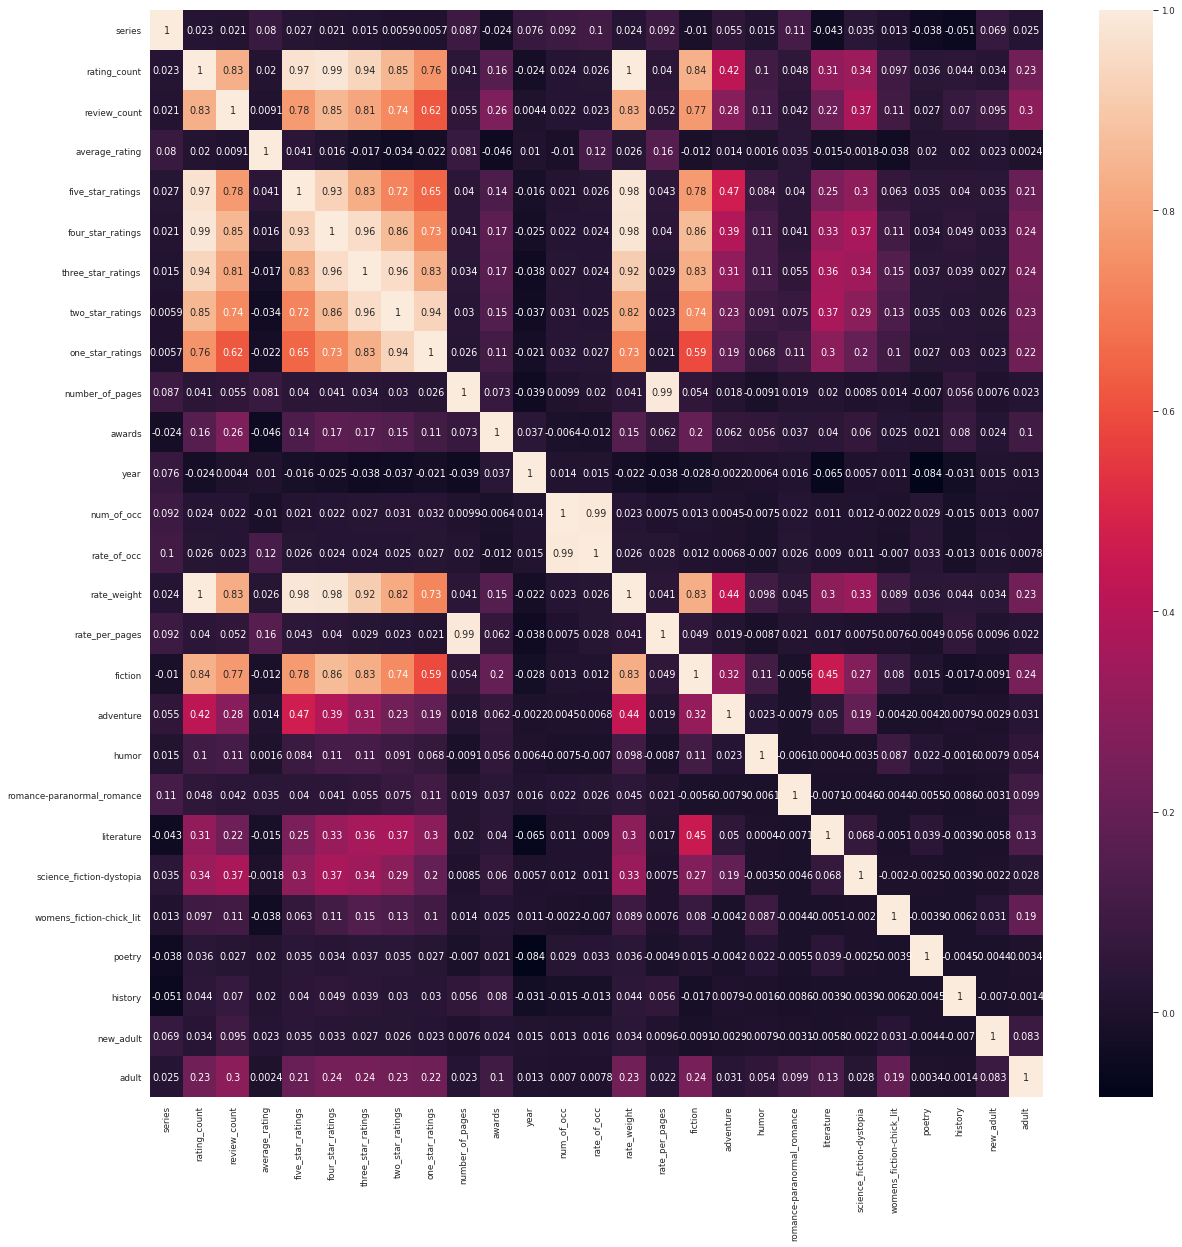

In [193]:
plt.figure(figsize = (20, 20))
sns.heatmap(books.corr(), annot = True)
plt.show()

It's not clearly evident which variables are impacting each other from this matrix. It looks like all the variables are loosely related. If we focus on 'average_rating', it looks to be influenced by 'rating_count' and 'number_of_pages'. Other than this, we couldn't see any other correlations.

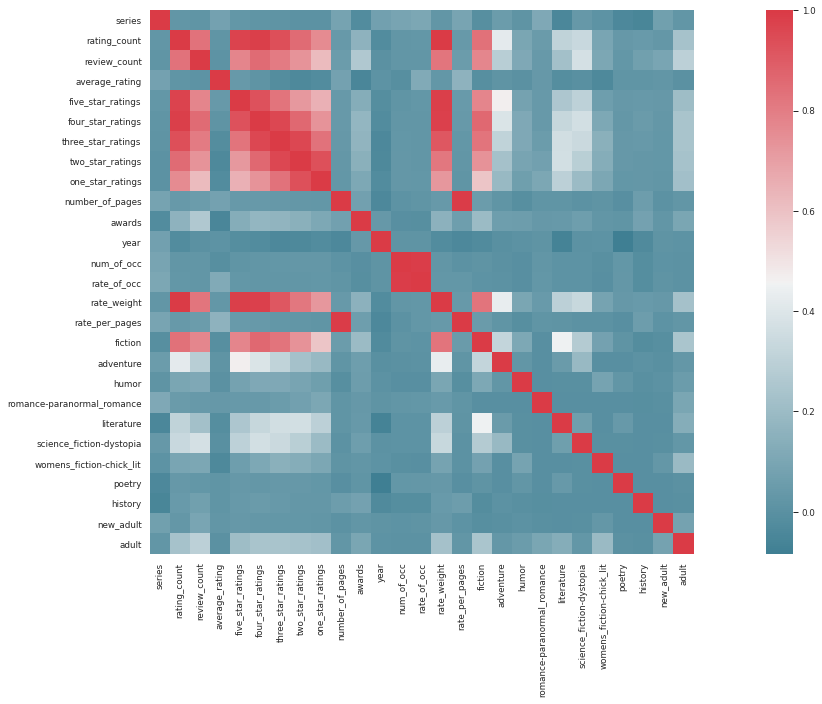

In [194]:
fig = plt.gcf()
fig.set_size_inches(26, 10)
corr = books.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

### SelectKBest

Our goal is to find the 10 best features that will go into the prediction model. For this, we are using the "SelectKBest" algorithm that tells us which variables are important for 'average_Rating'

Before doing that, all our data needs to be converted from string to numerical values. There are many encoders available that do this job. We are choosing Label encoder to convert all our string values to integer/float.

In [195]:
le = preprocessing.LabelEncoder()
books['title'] = le.fit_transform(books['title'])
#books['series'] = le.fit_transform(books['series'])
books['author'] = le.fit_transform(books['author'])
#books['date_published'] = le.fit_transform(books['date_published'])
books.update(books[top_features_list].fillna(0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:6397: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

We run the SelectKBest algorithm with "f_classif" hyperparameter to find the top 10 parameters

In [196]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = books.drop('average_rating', axis=1)  
y = books['average_rating']    

# apply SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
feature_Scores = pd.concat([dfcolumns,dfscores],axis=1)
feature_Scores.columns = ['Specifications','Score']  #naming the dataframe columns
feature_Scores = feature_Scores.sort_values(by='Score', ascending=False)
print(feature_Scores.nlargest(10,'Score'))  #print 10 best features

       Specifications      Score
16     rate_per_pages  12.316075
1              series  10.523048
10    number_of_pages   7.456252
11             awards   4.478101
14        rate_of_occ   3.618046
5   five_star_ratings   2.332521
15        rate_weight   1.771947
4        review_count   1.666872
3        rating_count   1.600528
6   four_star_ratings   1.591014


In [197]:
books_features = books[top_features_list]


# Machine Learning Model

We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. Use a 30% split for test. You can use seed value 833 if you would like to get similar values as this notebook:

We also wanted to make sure that the dataset is balanced and that we are able to scale all the variables properly. 

In [199]:
X = books_features
y = books['average_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=833)
type(feature_Scores)

pandas.core.frame.DataFrame

## Linear Regression

With the data arranged, we can follow our recipe to predict the labels:

First, instantiate a simple linear regrssion model. You would first need to import `LinearRegression`; it can be found under the `linear_model` module in `sklearn`. Call this model: `lr`.

We will instantiate the model with all the default parameters and then fit the model on the training data. Then predict on the test data set.

In [200]:
from sklearn.linear_model import LinearRegression  # 1. choose model class
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total


,Actual,Predicted
0,4.09,4.018354
1,4.08,4.023434
2,3.11,4.018532
3,4.07,4.018532
4,3.95,4.018197
5,3.97,4.018436
6,4.41,4.018532
7,4.11,4.019362
8,4.57,4.018532
9,4.07,4.015349


Plotting the predicted values vs actual values

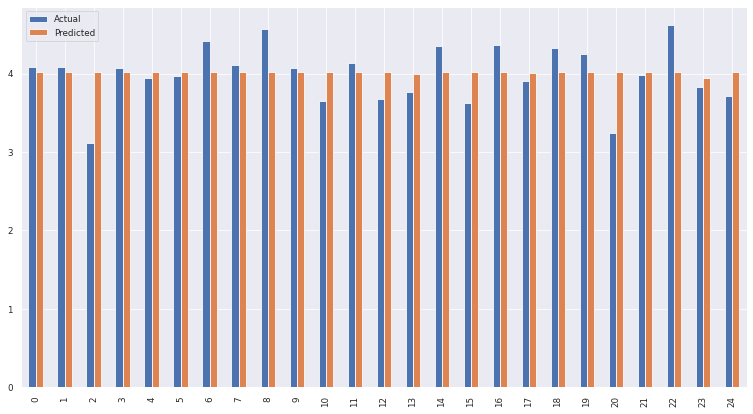

In [201]:
# visualise the above comparison result
pred.plot(kind='bar', figsize=(13, 7));

Though the model is not very precise, the predicted percentages are close to the actual ones.



In [202]:
# Check Model Score
print("Residual sum of squares: ",  np.mean((predictions - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, predictions))))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))


Residual sum of squares:  0.13267508248252693
RMSE: 0.3642459093559268
MAE: 0.25617111253898783
MSE: 0.13267508248252605


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


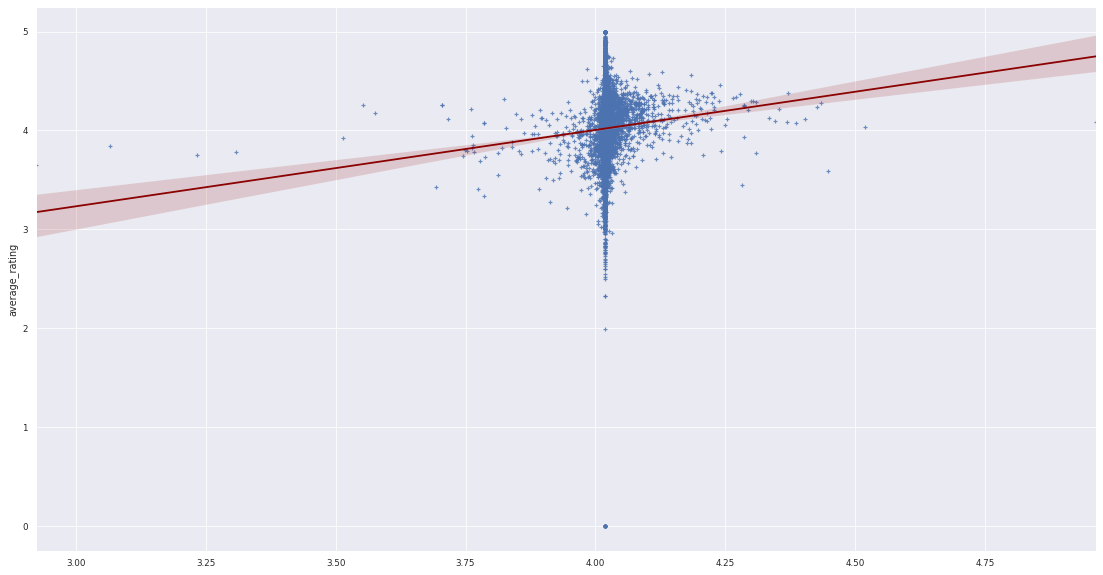

In [203]:
plt.figure(figsize=(19,10))
sns.regplot(predictions, y_test, marker="+", line_kws={'color':'darkred','alpha':1.0})

## Decision Tree Regression

We repeat the same process as above. This time, we are predicting the values using a Decision tree regressor.

In [204]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4))

parameters = {
    'learning_rate': [0.001, 0.01, 0.02, 0.1, 0.2, 1.0],
    'n_estimators': [10, 50, 100, 200]
}

grad_Ada = GridSearchCV(model, parameters, refit=True)
grad_Ada.fit(X_train, y_train)

print('Best Score: ', grad_Ada.best_score_*100, '\nBest Parameters: ', grad_Ada.best_params_)

# AdaBoost Model
pred_adaboost = grad_Ada.predict(X_test)

# Check Model Score
print("Residual sum of squares: ",  np.mean((pred_adaboost - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, pred_adaboost))))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

Best Score:  4.542781701473963 
Best Parameters:  {'learning_rate': 0.02, 'n_estimators': 10}
Residual sum of squares:  0.1271440393138596
RMSE: 0.35657262838566145
MAE: 0.25617111253898783
MSE: 0.13267508248252605


## Random forest Regression

We wanted to repeat the same steps with a Random forest regressor as well but because of the resource availability in Google collab, we were not able to run the following piece of code.

In [205]:

'''from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10, 12, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15]
}

grad_rf = GridSearchCV(model, parameters, refit=True, cv=10)
grad_rf.fit(X_train, y_train)

print('Best Score: ', grad_rf.best_score_*100, '\nBest Parameters: ', grad_rf.best_params_)

pred_rf = grad_rf.predict(X_test)
# Check Model Score
print("Residual sum of squares: ",  np.mean((pred_rf - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, pred_rf))))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))'''


'from sklearn.ensemble import RandomForestRegressor\n\nmodel = RandomForestRegressor()\n\nparameters = {\n    \'n_estimators\': [50, 100, 150, 200],\n    \'max_depth\': [3, 5, 7, 10, 12, 15],\n    \'min_samples_split\': [5, 10, 15],\n    \'min_samples_leaf\': [5, 10, 15]\n}\n\ngrad_rf = GridSearchCV(model, parameters, refit=True, cv=10)\ngrad_rf.fit(X_train, y_train)\n\nprint(\'Best Score: \', grad_rf.best_score_*100, \'\nBest Parameters: \', grad_rf.best_params_)\n\npred_rf = grad_rf.predict(X_test)\n# Check Model Score\nprint("Residual sum of squares: ",  np.mean((pred_rf - y_test) ** 2))\nprint(\'RMSE: \'+str(np.sqrt(mean_squared_error(y_test, pred_rf))))\nprint(\'MAE:\', metrics.mean_absolute_error(y_test, predictions))\nprint(\'MSE:\', metrics.mean_squared_error(y_test, predictions))'

# Final Thoughts and Conclusions

- The variable/column “series” shows whether the book “title” is part of a book collection or book series. This variable is in the format of >> 
"(CollectionName) #(book number in the series)" >> In some instances, the #part is not there. 
- The null values in “series” show that the corresponding book “title” is not a part of a book collection or book series, and hence, we replace them with 0.
There are a few null values in various columns. All those have been appropriately replaced. We felt that those small number of null values will not impact the model.
- We created 4 new variables to understand how average rating changes with the review count, rating count, etc. These variables are correlated with the average rating.
- We split the ‘genre_and_votes’ column and created a new genre column with votes value in it. We had more than 80 odd genres. Since all these genres are not important, we picked the top 10 repeated genres and used them in our model.
- The word cloud that we made on ‘description’ values has revealed that ‘one’ is the most popular word, followed by ‘love’, ‘life’ and ‘find. Surprisingly, all of us want to be the "One" and in "life", we are all "find"ing "love".
- Authors with the most books have been writing from decades and they also have better ratings, usually when they write series
- Amongst the top books under 200 pages, we have some of the world famous books and surprisingly, all these have higher review and rating counts as well
- The highest rated author, Bella Forrest, is way ahead of other authors. Her book series, ‘Vampires’, has been a huge success
- "The Story of Civilization" and "The Complete Wheel of Time" should be the longest books in the dataset based purely on subject matter. The longest books are composed primarily of volume sets, such as the Aubrey/Maturin Novels and - "The Story of Civilization", or series bound in one volume, such as the Animorphs series.
- Perhaps unsurprisingly, the authors on the ‘Top 10 by review count’ list overlap with many of the titles on the top 10 books by review count list. - Authors like J.K. Rowling and Suzanne Collins also can contribute review counts to writing popular series, which we may find yields a higher likelihood of users leaving reviews for books in the progression of the series.
- On average, the large majority of ratings among the dataset fall between about 3.4 and 4.6. There's a small increase in five star ratings that may be indicative of fan bases rallying around certain books and increasing the number of five star reviews.
- We also inferred that the highest ratings ever given, usually are for books with the page range of 200-400, peaking near 250. This might mean that people usually want to read books that are not too lengthy, somewhere between 200 and 400 pages. So, this is something that future authors might want to consider
Most of the 5 star average ratings have lesser number of five star reviews. Also, as the number of five star reviews increase, so does the average rating.
As the number of ratings increase, the rating for the book seems to increase towards 4.
- We also observed a strong correlation between the average rating and the review count, rating count and five star rating. 
‘- Rate_per_pages’ seems to be the most important feature as it was found to have the highest impact on average rating. So, it is suggested that future authors should try to have better ratings as well as lesser pages to get this ratio up.
- Linear regression and Decision tree regression have similar values.
